In [1]:
import os 
import gensim
import smart_open
import  collections
import random
import warnings 
import logging
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')


/usr/local/lib/python3.5/dist-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [37]:
train_file = '/home/fatemeh/Documents/python/dnn-understanding/code/moreofthem.txt'
test_file = '/home/fatemeh/Documents/python/dnn-understanding/code/accuracy/capitalcommoncountries.txt'

In [38]:
def read_corpus(fname, tokens_only=False):
    with smart_open.smart_open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            if tokens_only:
                yield gensim.utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [39]:
train_corpus = list(read_corpus(train_file))
test_corpus = list(read_corpus(test_file, tokens_only=True))

In [40]:
train_corpus[:2]

[TaggedDocument(words=['dixon', 'porter', 'in', 'an', 'one', 'eight', 'six', 'five', 'meeting', 'on', 'the', 'steamer', 'river', 'queen', 'when', 'richmond', 'the', 'confederate', 'capital', 'was', 'at', 'long', 'last', 'captured', 'lincoln'], tags=[0]),
 TaggedDocument(words=['victims', 'the', 'message', 'of', 'the', 'american', 'right', 'philosopher', 'queen', 'critical', 'profile', 'from', 'the', 'london', 'independent', 'the', 'sociology', 'of', 'the', 'ayn', 'rand', 'cult', 'by'], tags=[1])]

In [41]:
#dimension of 400 resulted in zero accuracy in all test cases

In [42]:
#for this to work dm = 0
#iter is equally important = 20
#55 was worse

In [43]:
model = gensim.models.doc2vec.Doc2Vec(size=300, min_count=3, iter=20)
#(size=400, min_count=3, iter=55)
#Doc2Vec(size=400, window=8, min_count=3, workers=8, dm=1, hs=0, dbow_words=0, dm_concat=1)

In [44]:
#model = Doc2Vec(documents, size=100, window=8, min_count=5, workers=4)

In [45]:
model.build_vocab(train_corpus)

2017-06-05 12:12:07,739 : INFO : collecting all words and their counts
2017-06-05 12:12:07,740 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2017-06-05 12:12:08,008 : INFO : PROGRESS: at example #10000, processed 962257 words (3602182/s), 45516 word types, 10000 tags
2017-06-05 12:12:08,122 : INFO : PROGRESS: at example #20000, processed 1203075 words (2127041/s), 53193 word types, 20000 tags
2017-06-05 12:12:08,235 : INFO : PROGRESS: at example #30000, processed 1443446 words (2147301/s), 60107 word types, 30000 tags
2017-06-05 12:12:08,332 : INFO : PROGRESS: at example #40000, processed 1684074 words (2503806/s), 67394 word types, 40000 tags
2017-06-05 12:12:08,426 : INFO : PROGRESS: at example #50000, processed 1925337 words (2603702/s), 73985 word types, 50000 tags
2017-06-05 12:12:08,518 : INFO : PROGRESS: at example #60000, processed 2166374 words (2633831/s), 78520 word types, 60000 tags
2017-06-05 12:12:08,637 : INFO : PROGRESS: at example #700

2017-06-05 12:12:14,855 : INFO : PROGRESS: at example #630000, processed 15879288 words (2388784/s), 245631 word types, 630000 tags
2017-06-05 12:12:14,955 : INFO : PROGRESS: at example #640000, processed 16118873 words (2422445/s), 247488 word types, 640000 tags
2017-06-05 12:12:15,056 : INFO : PROGRESS: at example #650000, processed 16358676 words (2410260/s), 249413 word types, 650000 tags
2017-06-05 12:12:15,155 : INFO : PROGRESS: at example #660000, processed 16598856 words (2446074/s), 251342 word types, 660000 tags
2017-06-05 12:12:15,255 : INFO : PROGRESS: at example #670000, processed 16839782 words (2462047/s), 253705 word types, 670000 tags
2017-06-05 12:12:15,390 : INFO : PROGRESS: at example #680000, processed 17079796 words (1793211/s), 255418 word types, 680000 tags
2017-06-05 12:12:19,961 : INFO : collected 256621 word types and 680211 unique tags from a corpus of 680211 examples and 33708779 words
2017-06-05 12:12:19,962 : INFO : Loading a fresh vocabulary
2017-06-05 1

In [46]:
%time model.train(train_corpus, total_examples=model.corpus_count)

2017-06-05 12:12:43,731 : INFO : training model with 3 workers on 137316 vocabulary and 600 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2017-06-05 12:12:44,793 : INFO : PROGRESS: at 0.02% examples, 57860 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:12:45,802 : INFO : PROGRESS: at 0.05% examples, 72351 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:12:46,806 : INFO : PROGRESS: at 0.09% examples, 77046 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:12:47,962 : INFO : PROGRESS: at 0.12% examples, 76746 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:12:49,060 : INFO : PROGRESS: at 0.16% examples, 78845 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:12:50,091 : INFO : PROGRESS: at 0.19% examples, 79585 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:12:51,140 : INFO : PROGRESS: at 0.22% examples, 80023 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:12:52,199 : INFO : PROGRESS: at 0.26% examples, 80148 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:12:53,202 : INFO : PROGRESS

2017-06-05 12:14:10,323 : INFO : PROGRESS: at 2.75% examples, 82565 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:11,342 : INFO : PROGRESS: at 2.78% examples, 82603 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:14:12,397 : INFO : PROGRESS: at 2.81% examples, 82618 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:13,400 : INFO : PROGRESS: at 2.85% examples, 82643 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:14,413 : INFO : PROGRESS: at 2.88% examples, 82683 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:14:15,483 : INFO : PROGRESS: at 2.91% examples, 82672 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:16,670 : INFO : PROGRESS: at 2.95% examples, 82642 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:17,684 : INFO : PROGRESS: at 2.98% examples, 82689 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:18,705 : INFO : PROGRESS: at 3.02% examples, 82721 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:14:19,782 : INFO : PROGRESS: at 3.05% examples, 82705 words/s, in_qsize 5, ou

2017-06-05 12:15:38,647 : INFO : PROGRESS: at 5.57% examples, 82777 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:15:39,758 : INFO : PROGRESS: at 5.61% examples, 82803 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:40,896 : INFO : PROGRESS: at 5.65% examples, 82804 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:41,918 : INFO : PROGRESS: at 5.68% examples, 82818 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:42,926 : INFO : PROGRESS: at 5.71% examples, 82802 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:15:43,951 : INFO : PROGRESS: at 5.75% examples, 82846 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:45,030 : INFO : PROGRESS: at 5.78% examples, 82791 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:46,154 : INFO : PROGRESS: at 5.81% examples, 82805 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:47,219 : INFO : PROGRESS: at 5.85% examples, 82839 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:15:48,343 : INFO : PROGRESS: at 5.88% examples, 82809 words/s, in_qsize 6, ou

2017-06-05 12:17:06,606 : INFO : PROGRESS: at 8.39% examples, 82980 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:17:07,632 : INFO : PROGRESS: at 8.42% examples, 82931 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:17:08,653 : INFO : PROGRESS: at 8.45% examples, 82972 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:17:09,861 : INFO : PROGRESS: at 8.49% examples, 82949 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:17:10,876 : INFO : PROGRESS: at 8.52% examples, 82962 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:17:11,938 : INFO : PROGRESS: at 8.55% examples, 82933 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:17:12,983 : INFO : PROGRESS: at 8.58% examples, 82907 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:17:14,010 : INFO : PROGRESS: at 8.62% examples, 82909 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:17:15,167 : INFO : PROGRESS: at 8.65% examples, 82880 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:17:16,318 : INFO : PROGRESS: at 8.69% examples, 82882 words/s, in_qsize 6, ou

2017-06-05 12:18:33,375 : INFO : PROGRESS: at 11.16% examples, 82943 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:18:34,408 : INFO : PROGRESS: at 11.20% examples, 82954 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:18:35,472 : INFO : PROGRESS: at 11.23% examples, 82972 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:18:36,565 : INFO : PROGRESS: at 11.27% examples, 82981 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:18:37,698 : INFO : PROGRESS: at 11.31% examples, 82991 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:18:38,716 : INFO : PROGRESS: at 11.34% examples, 82998 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:18:39,737 : INFO : PROGRESS: at 11.37% examples, 83006 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:18:40,739 : INFO : PROGRESS: at 11.41% examples, 83023 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:18:41,936 : INFO : PROGRESS: at 11.45% examples, 83035 words/s, in_qsize 6, out_qsize 1
2017-06-05 12:18:43,073 : INFO : PROGRESS: at 11.48% examples, 83039 words/s, in_q

2017-06-05 12:19:59,660 : INFO : PROGRESS: at 14.05% examples, 83758 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:20:00,718 : INFO : PROGRESS: at 14.09% examples, 83755 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:20:01,820 : INFO : PROGRESS: at 14.12% examples, 83761 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:20:02,987 : INFO : PROGRESS: at 14.16% examples, 83773 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:20:04,146 : INFO : PROGRESS: at 14.20% examples, 83772 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:20:05,221 : INFO : PROGRESS: at 14.24% examples, 83796 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:20:06,341 : INFO : PROGRESS: at 14.28% examples, 83799 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:20:07,417 : INFO : PROGRESS: at 14.31% examples, 83811 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:20:08,570 : INFO : PROGRESS: at 14.35% examples, 83806 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:20:09,678 : INFO : PROGRESS: at 14.39% examples, 83829 words/s, in_q

2017-06-05 12:21:26,464 : INFO : PROGRESS: at 16.96% examples, 84322 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:21:27,592 : INFO : PROGRESS: at 17.00% examples, 84339 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:21:28,648 : INFO : PROGRESS: at 17.04% examples, 84349 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:21:29,727 : INFO : PROGRESS: at 17.07% examples, 84356 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:21:30,785 : INFO : PROGRESS: at 17.11% examples, 84355 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:21:31,824 : INFO : PROGRESS: at 17.14% examples, 84370 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:21:32,944 : INFO : PROGRESS: at 17.18% examples, 84370 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:21:34,024 : INFO : PROGRESS: at 17.21% examples, 84362 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:21:35,066 : INFO : PROGRESS: at 17.25% examples, 84363 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:21:36,183 : INFO : PROGRESS: at 17.28% examples, 84365 words/s, in_q

2017-06-05 12:22:53,152 : INFO : PROGRESS: at 19.88% examples, 84727 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:22:54,182 : INFO : PROGRESS: at 19.91% examples, 84727 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:22:55,214 : INFO : PROGRESS: at 19.95% examples, 84739 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:22:56,233 : INFO : PROGRESS: at 19.98% examples, 84743 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:22:57,330 : INFO : PROGRESS: at 20.01% examples, 84741 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:22:58,432 : INFO : PROGRESS: at 20.05% examples, 84749 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:22:59,441 : INFO : PROGRESS: at 20.08% examples, 84765 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:23:00,470 : INFO : PROGRESS: at 20.11% examples, 84753 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:23:01,529 : INFO : PROGRESS: at 20.15% examples, 84762 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:23:02,552 : INFO : PROGRESS: at 20.18% examples, 84761 words/s, in_q

2017-06-05 12:24:19,017 : INFO : PROGRESS: at 22.73% examples, 84973 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:24:20,024 : INFO : PROGRESS: at 22.77% examples, 84974 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:24:21,046 : INFO : PROGRESS: at 22.80% examples, 84988 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:24:22,197 : INFO : PROGRESS: at 22.84% examples, 84982 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:24:23,257 : INFO : PROGRESS: at 22.88% examples, 84988 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:24:24,334 : INFO : PROGRESS: at 22.91% examples, 84994 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:24:25,357 : INFO : PROGRESS: at 22.95% examples, 84995 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:24:26,406 : INFO : PROGRESS: at 22.98% examples, 85005 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:24:27,478 : INFO : PROGRESS: at 23.02% examples, 85011 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:24:28,507 : INFO : PROGRESS: at 23.05% examples, 85011 words/s, in_q

2017-06-05 12:25:45,818 : INFO : PROGRESS: at 25.65% examples, 85220 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:47,014 : INFO : PROGRESS: at 25.69% examples, 85211 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:48,045 : INFO : PROGRESS: at 25.73% examples, 85220 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:49,106 : INFO : PROGRESS: at 25.76% examples, 85225 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:50,129 : INFO : PROGRESS: at 25.80% examples, 85224 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:51,225 : INFO : PROGRESS: at 25.83% examples, 85226 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:25:52,354 : INFO : PROGRESS: at 25.87% examples, 85226 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:53,441 : INFO : PROGRESS: at 25.91% examples, 85239 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:25:54,528 : INFO : PROGRESS: at 25.94% examples, 85232 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:25:55,677 : INFO : PROGRESS: at 25.98% examples, 85227 words/s, in_q

2017-06-05 12:27:14,775 : INFO : PROGRESS: at 28.20% examples, 84126 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:27:15,834 : INFO : PROGRESS: at 28.23% examples, 84123 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:27:16,853 : INFO : PROGRESS: at 28.26% examples, 84124 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:27:17,891 : INFO : PROGRESS: at 28.30% examples, 84124 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:27:18,897 : INFO : PROGRESS: at 28.33% examples, 84118 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:27:20,003 : INFO : PROGRESS: at 28.36% examples, 84111 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:27:21,208 : INFO : PROGRESS: at 28.40% examples, 84105 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:27:22,412 : INFO : PROGRESS: at 28.43% examples, 84099 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:27:23,520 : INFO : PROGRESS: at 28.46% examples, 84074 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:27:24,646 : INFO : PROGRESS: at 28.49% examples, 84038 words/s, in_q

2017-06-05 12:28:42,870 : INFO : PROGRESS: at 30.90% examples, 83711 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:28:43,957 : INFO : PROGRESS: at 30.94% examples, 83706 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:45,090 : INFO : PROGRESS: at 30.97% examples, 83706 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:46,269 : INFO : PROGRESS: at 31.01% examples, 83702 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:47,383 : INFO : PROGRESS: at 31.05% examples, 83704 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:48,475 : INFO : PROGRESS: at 31.08% examples, 83700 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:49,574 : INFO : PROGRESS: at 31.12% examples, 83703 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:50,665 : INFO : PROGRESS: at 31.15% examples, 83700 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:28:51,672 : INFO : PROGRESS: at 31.18% examples, 83696 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:28:52,698 : INFO : PROGRESS: at 31.21% examples, 83699 words/s, in_q

2017-06-05 12:30:09,844 : INFO : PROGRESS: at 33.53% examples, 83284 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:10,857 : INFO : PROGRESS: at 33.55% examples, 83273 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:11,969 : INFO : PROGRESS: at 33.59% examples, 83267 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:13,157 : INFO : PROGRESS: at 33.62% examples, 83264 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:30:14,288 : INFO : PROGRESS: at 33.66% examples, 83258 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:30:15,377 : INFO : PROGRESS: at 33.68% examples, 83240 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:16,563 : INFO : PROGRESS: at 33.72% examples, 83229 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:17,697 : INFO : PROGRESS: at 33.75% examples, 83226 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:18,735 : INFO : PROGRESS: at 33.79% examples, 83227 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:30:19,855 : INFO : PROGRESS: at 33.83% examples, 83226 words/s, in_q

2017-06-05 12:31:36,444 : INFO : PROGRESS: at 36.20% examples, 83026 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:31:37,455 : INFO : PROGRESS: at 36.23% examples, 83035 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:31:38,522 : INFO : PROGRESS: at 36.27% examples, 83033 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:31:39,571 : INFO : PROGRESS: at 36.30% examples, 83035 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:31:40,635 : INFO : PROGRESS: at 36.32% examples, 83013 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:31:41,774 : INFO : PROGRESS: at 36.36% examples, 83014 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:31:42,828 : INFO : PROGRESS: at 36.40% examples, 83022 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:31:44,021 : INFO : PROGRESS: at 36.43% examples, 83012 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:31:45,175 : INFO : PROGRESS: at 36.47% examples, 83012 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:31:46,333 : INFO : PROGRESS: at 36.50% examples, 83014 words/s, in_q

2017-06-05 12:33:03,826 : INFO : PROGRESS: at 38.52% examples, 82036 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:33:04,925 : INFO : PROGRESS: at 38.54% examples, 82014 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:33:06,022 : INFO : PROGRESS: at 38.57% examples, 82000 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:33:07,108 : INFO : PROGRESS: at 38.60% examples, 81991 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:33:08,178 : INFO : PROGRESS: at 38.62% examples, 81971 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:33:09,197 : INFO : PROGRESS: at 38.65% examples, 81962 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:33:10,214 : INFO : PROGRESS: at 38.68% examples, 81953 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:33:11,272 : INFO : PROGRESS: at 38.70% examples, 81921 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:33:12,316 : INFO : PROGRESS: at 38.72% examples, 81909 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:33:13,394 : INFO : PROGRESS: at 38.74% examples, 81882 words/s, in_q

2017-06-05 12:34:31,287 : INFO : PROGRESS: at 40.85% examples, 81170 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:34:32,354 : INFO : PROGRESS: at 40.88% examples, 81171 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:34:33,378 : INFO : PROGRESS: at 40.92% examples, 81174 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:34:34,388 : INFO : PROGRESS: at 40.95% examples, 81177 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:34:35,560 : INFO : PROGRESS: at 40.99% examples, 81171 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:34:36,605 : INFO : PROGRESS: at 41.01% examples, 81161 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:34:37,657 : INFO : PROGRESS: at 41.05% examples, 81162 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:34:38,767 : INFO : PROGRESS: at 41.08% examples, 81160 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:34:39,947 : INFO : PROGRESS: at 41.12% examples, 81165 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:34:41,016 : INFO : PROGRESS: at 41.15% examples, 81167 words/s, in_q

2017-06-05 12:35:58,451 : INFO : PROGRESS: at 43.59% examples, 81209 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:35:59,483 : INFO : PROGRESS: at 43.62% examples, 81211 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:36:00,493 : INFO : PROGRESS: at 43.65% examples, 81215 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:36:01,535 : INFO : PROGRESS: at 43.68% examples, 81206 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:36:02,676 : INFO : PROGRESS: at 43.71% examples, 81197 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:36:03,689 : INFO : PROGRESS: at 43.74% examples, 81194 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:36:04,697 : INFO : PROGRESS: at 43.78% examples, 81198 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:36:05,869 : INFO : PROGRESS: at 43.82% examples, 81195 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:36:06,943 : INFO : PROGRESS: at 43.85% examples, 81198 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:36:08,003 : INFO : PROGRESS: at 43.89% examples, 81203 words/s, in_q

2017-06-05 12:37:25,617 : INFO : PROGRESS: at 46.43% examples, 81413 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:37:26,664 : INFO : PROGRESS: at 46.47% examples, 81420 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:37:27,818 : INFO : PROGRESS: at 46.51% examples, 81428 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:37:28,884 : INFO : PROGRESS: at 46.55% examples, 81434 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:37:30,008 : INFO : PROGRESS: at 46.58% examples, 81437 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:37:31,044 : INFO : PROGRESS: at 46.62% examples, 81445 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:37:32,133 : INFO : PROGRESS: at 46.66% examples, 81451 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:37:33,205 : INFO : PROGRESS: at 46.69% examples, 81451 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:37:34,370 : INFO : PROGRESS: at 46.73% examples, 81457 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:37:35,428 : INFO : PROGRESS: at 46.77% examples, 81464 words/s, in_q

2017-06-05 12:38:52,637 : INFO : PROGRESS: at 49.14% examples, 81383 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:38:53,839 : INFO : PROGRESS: at 49.18% examples, 81377 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:38:54,901 : INFO : PROGRESS: at 49.21% examples, 81378 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:38:56,071 : INFO : PROGRESS: at 49.25% examples, 81372 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:38:57,126 : INFO : PROGRESS: at 49.28% examples, 81373 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:38:58,177 : INFO : PROGRESS: at 49.31% examples, 81369 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:38:59,259 : INFO : PROGRESS: at 49.34% examples, 81368 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:39:00,274 : INFO : PROGRESS: at 49.37% examples, 81366 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:39:01,386 : INFO : PROGRESS: at 49.41% examples, 81364 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:39:02,411 : INFO : PROGRESS: at 49.44% examples, 81362 words/s, in_q

2017-06-05 12:40:19,696 : INFO : PROGRESS: at 51.66% examples, 81058 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:20,702 : INFO : PROGRESS: at 51.69% examples, 81053 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:21,780 : INFO : PROGRESS: at 51.72% examples, 81048 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:40:22,811 : INFO : PROGRESS: at 51.75% examples, 81046 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:23,893 : INFO : PROGRESS: at 51.78% examples, 81046 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:40:24,950 : INFO : PROGRESS: at 51.82% examples, 81053 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:26,064 : INFO : PROGRESS: at 51.85% examples, 81046 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:27,201 : INFO : PROGRESS: at 51.89% examples, 81048 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:28,377 : INFO : PROGRESS: at 51.92% examples, 81047 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:40:29,386 : INFO : PROGRESS: at 51.96% examples, 81055 words/s, in_q

2017-06-05 12:41:47,151 : INFO : PROGRESS: at 54.00% examples, 80471 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:48,164 : INFO : PROGRESS: at 54.02% examples, 80460 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:41:49,209 : INFO : PROGRESS: at 54.04% examples, 80439 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:50,275 : INFO : PROGRESS: at 54.06% examples, 80412 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:51,352 : INFO : PROGRESS: at 54.08% examples, 80394 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:41:52,504 : INFO : PROGRESS: at 54.10% examples, 80369 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:53,747 : INFO : PROGRESS: at 54.11% examples, 80339 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:54,779 : INFO : PROGRESS: at 54.13% examples, 80314 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:55,902 : INFO : PROGRESS: at 54.15% examples, 80289 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:41:56,925 : INFO : PROGRESS: at 54.17% examples, 80270 words/s, in_q

2017-06-05 12:43:13,932 : INFO : PROGRESS: at 56.16% examples, 79726 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:43:15,002 : INFO : PROGRESS: at 56.19% examples, 79715 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:43:16,019 : INFO : PROGRESS: at 56.21% examples, 79705 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:43:17,200 : INFO : PROGRESS: at 56.24% examples, 79692 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:43:18,235 : INFO : PROGRESS: at 56.27% examples, 79686 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:43:19,400 : INFO : PROGRESS: at 56.28% examples, 79662 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:43:20,458 : INFO : PROGRESS: at 56.31% examples, 79655 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:43:21,493 : INFO : PROGRESS: at 56.35% examples, 79658 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:43:22,804 : INFO : PROGRESS: at 56.38% examples, 79645 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:43:23,831 : INFO : PROGRESS: at 56.40% examples, 79640 words/s, in_q

2017-06-05 12:44:40,183 : INFO : PROGRESS: at 58.38% examples, 79153 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:41,245 : INFO : PROGRESS: at 58.41% examples, 79151 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:42,269 : INFO : PROGRESS: at 58.44% examples, 79146 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:43,290 : INFO : PROGRESS: at 58.46% examples, 79141 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:44,372 : INFO : PROGRESS: at 58.49% examples, 79137 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:44:45,389 : INFO : PROGRESS: at 58.53% examples, 79137 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:46,447 : INFO : PROGRESS: at 58.55% examples, 79131 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:47,466 : INFO : PROGRESS: at 58.58% examples, 79127 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:48,624 : INFO : PROGRESS: at 58.61% examples, 79119 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:44:49,633 : INFO : PROGRESS: at 58.64% examples, 79115 words/s, in_q

2017-06-05 12:46:05,327 : INFO : PROGRESS: at 60.67% examples, 78755 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:06,374 : INFO : PROGRESS: at 60.70% examples, 78750 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:07,443 : INFO : PROGRESS: at 60.74% examples, 78751 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:08,444 : INFO : PROGRESS: at 60.76% examples, 78747 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:09,479 : INFO : PROGRESS: at 60.79% examples, 78738 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:10,551 : INFO : PROGRESS: at 60.81% examples, 78731 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:46:11,574 : INFO : PROGRESS: at 60.85% examples, 78731 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:12,641 : INFO : PROGRESS: at 60.88% examples, 78729 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:13,649 : INFO : PROGRESS: at 60.90% examples, 78721 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:46:14,688 : INFO : PROGRESS: at 60.93% examples, 78719 words/s, in_q

2017-06-05 12:47:41,188 : INFO : PROGRESS: at 62.57% examples, 77517 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:47:42,510 : INFO : PROGRESS: at 62.58% examples, 77479 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:47:43,992 : INFO : PROGRESS: at 62.59% examples, 77436 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:47:45,485 : INFO : PROGRESS: at 62.60% examples, 77388 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:47:47,455 : INFO : PROGRESS: at 62.61% examples, 77327 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:47:48,661 : INFO : PROGRESS: at 62.62% examples, 77298 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:47:49,892 : INFO : PROGRESS: at 62.64% examples, 77275 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:47:51,043 : INFO : PROGRESS: at 62.65% examples, 77244 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:47:53,119 : INFO : PROGRESS: at 62.65% examples, 77177 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:47:54,986 : INFO : PROGRESS: at 62.66% examples, 77116 words/s, in_q

2017-06-05 12:50:11,076 : INFO : PROGRESS: at 63.25% examples, 73127 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:12,885 : INFO : PROGRESS: at 63.26% examples, 73079 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:14,700 : INFO : PROGRESS: at 63.26% examples, 73024 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:16,837 : INFO : PROGRESS: at 63.27% examples, 72962 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:18,064 : INFO : PROGRESS: at 63.27% examples, 72929 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:21,651 : INFO : PROGRESS: at 63.28% examples, 72817 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:22,707 : INFO : PROGRESS: at 63.28% examples, 72786 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:50:24,499 : INFO : PROGRESS: at 63.28% examples, 72732 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:26,503 : INFO : PROGRESS: at 63.28% examples, 72671 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:50:28,559 : INFO : PROGRESS: at 63.29% examples, 72608 words/s, in_q

2017-06-05 12:52:34,606 : INFO : PROGRESS: at 63.93% examples, 69466 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:52:35,625 : INFO : PROGRESS: at 63.93% examples, 69443 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:52:37,402 : INFO : PROGRESS: at 63.94% examples, 69398 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:52:38,643 : INFO : PROGRESS: at 63.96% examples, 69382 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:52:39,658 : INFO : PROGRESS: at 63.97% examples, 69372 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:52:42,357 : INFO : PROGRESS: at 63.99% examples, 69307 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:52:43,400 : INFO : PROGRESS: at 64.01% examples, 69300 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:52:44,547 : INFO : PROGRESS: at 64.03% examples, 69287 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:52:45,623 : INFO : PROGRESS: at 64.04% examples, 69275 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:52:46,794 : INFO : PROGRESS: at 64.05% examples, 69248 words/s, in_q

2017-06-05 12:55:04,902 : INFO : PROGRESS: at 64.53% examples, 65972 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:07,370 : INFO : PROGRESS: at 64.53% examples, 65914 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:10,003 : INFO : PROGRESS: at 64.54% examples, 65849 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:12,109 : INFO : PROGRESS: at 64.54% examples, 65803 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:14,632 : INFO : PROGRESS: at 64.55% examples, 65741 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:55:15,765 : INFO : PROGRESS: at 64.55% examples, 65715 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:55:19,238 : INFO : PROGRESS: at 64.56% examples, 65632 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:20,608 : INFO : PROGRESS: at 64.56% examples, 65600 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:21,867 : INFO : PROGRESS: at 64.56% examples, 65571 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:55:23,066 : INFO : PROGRESS: at 64.57% examples, 65543 words/s, in_q

2017-06-05 12:58:17,502 : INFO : PROGRESS: at 64.91% examples, 61688 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:19,076 : INFO : PROGRESS: at 64.92% examples, 61655 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:20,104 : INFO : PROGRESS: at 64.92% examples, 61638 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:58:21,373 : INFO : PROGRESS: at 64.93% examples, 61612 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:22,698 : INFO : PROGRESS: at 64.94% examples, 61591 words/s, in_qsize 5, out_qsize 0
2017-06-05 12:58:23,781 : INFO : PROGRESS: at 64.94% examples, 61573 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:26,745 : INFO : PROGRESS: at 64.95% examples, 61509 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:28,469 : INFO : PROGRESS: at 64.95% examples, 61473 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:30,189 : INFO : PROGRESS: at 64.95% examples, 61438 words/s, in_qsize 6, out_qsize 0
2017-06-05 12:58:31,784 : INFO : PROGRESS: at 64.96% examples, 61411 words/s, in_q

2017-06-05 13:00:10,160 : INFO : PROGRESS: at 65.60% examples, 59872 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:11,250 : INFO : PROGRESS: at 65.60% examples, 59854 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:12,893 : INFO : PROGRESS: at 65.61% examples, 59828 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:00:15,722 : INFO : PROGRESS: at 65.62% examples, 59775 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:16,942 : INFO : PROGRESS: at 65.62% examples, 59755 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:18,366 : INFO : PROGRESS: at 65.63% examples, 59728 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:19,455 : INFO : PROGRESS: at 65.63% examples, 59708 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:21,965 : INFO : PROGRESS: at 65.63% examples, 59661 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:00:23,321 : INFO : PROGRESS: at 65.64% examples, 59635 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:00:24,708 : INFO : PROGRESS: at 65.64% examples, 59612 words/s, in_q

2017-06-05 13:01:59,939 : INFO : PROGRESS: at 66.24% examples, 58212 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:02:01,230 : INFO : PROGRESS: at 66.25% examples, 58199 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:02:02,444 : INFO : PROGRESS: at 66.26% examples, 58181 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:02:04,116 : INFO : PROGRESS: at 66.27% examples, 58159 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:02:05,680 : INFO : PROGRESS: at 66.27% examples, 58134 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:02:06,759 : INFO : PROGRESS: at 66.28% examples, 58115 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:02:08,264 : INFO : PROGRESS: at 66.28% examples, 58091 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:02:09,439 : INFO : PROGRESS: at 66.29% examples, 58071 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:02:10,488 : INFO : PROGRESS: at 66.29% examples, 58056 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:02:12,295 : INFO : PROGRESS: at 66.30% examples, 58023 words/s, in_q

2017-06-05 13:03:53,732 : INFO : PROGRESS: at 67.24% examples, 56907 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:03:55,301 : INFO : PROGRESS: at 67.25% examples, 56885 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:03:56,397 : INFO : PROGRESS: at 67.27% examples, 56880 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:03:57,461 : INFO : PROGRESS: at 67.28% examples, 56876 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:03:58,531 : INFO : PROGRESS: at 67.30% examples, 56875 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:03:59,751 : INFO : PROGRESS: at 67.32% examples, 56868 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:04:00,775 : INFO : PROGRESS: at 67.33% examples, 56856 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:04:01,853 : INFO : PROGRESS: at 67.35% examples, 56855 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:04:03,183 : INFO : PROGRESS: at 67.37% examples, 56843 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:04:04,344 : INFO : PROGRESS: at 67.38% examples, 56834 words/s, in_q

2017-06-05 13:05:41,297 : INFO : PROGRESS: at 68.45% examples, 55975 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:05:42,737 : INFO : PROGRESS: at 68.47% examples, 55962 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:05:43,944 : INFO : PROGRESS: at 68.48% examples, 55951 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:05:45,091 : INFO : PROGRESS: at 68.51% examples, 55953 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:05:46,661 : INFO : PROGRESS: at 68.53% examples, 55940 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:05:48,045 : INFO : PROGRESS: at 68.53% examples, 55923 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:05:49,054 : INFO : PROGRESS: at 68.57% examples, 55934 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:05:50,296 : INFO : PROGRESS: at 68.59% examples, 55931 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:05:51,359 : INFO : PROGRESS: at 68.62% examples, 55935 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:05:52,656 : INFO : PROGRESS: at 68.66% examples, 55942 words/s, in_q

2017-06-05 13:07:16,853 : INFO : PROGRESS: at 70.48% examples, 55944 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:07:17,900 : INFO : PROGRESS: at 70.51% examples, 55948 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:07:19,015 : INFO : PROGRESS: at 70.54% examples, 55953 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:07:20,292 : INFO : PROGRESS: at 70.55% examples, 55943 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:07:21,315 : INFO : PROGRESS: at 70.58% examples, 55947 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:07:22,316 : INFO : PROGRESS: at 70.61% examples, 55952 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:07:23,438 : INFO : PROGRESS: at 70.63% examples, 55954 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:07:24,452 : INFO : PROGRESS: at 70.66% examples, 55959 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:07:25,520 : INFO : PROGRESS: at 70.68% examples, 55957 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:07:26,597 : INFO : PROGRESS: at 70.71% examples, 55959 words/s, in_q

2017-06-05 13:08:54,136 : INFO : PROGRESS: at 72.16% examples, 55632 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:08:55,305 : INFO : PROGRESS: at 72.18% examples, 55622 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:08:56,347 : INFO : PROGRESS: at 72.19% examples, 55616 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:08:57,423 : INFO : PROGRESS: at 72.20% examples, 55603 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:08:58,535 : INFO : PROGRESS: at 72.21% examples, 55592 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:08:59,561 : INFO : PROGRESS: at 72.23% examples, 55589 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:09:01,185 : INFO : PROGRESS: at 72.23% examples, 55567 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:09:02,431 : INFO : PROGRESS: at 72.24% examples, 55556 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:09:04,985 : INFO : PROGRESS: at 72.25% examples, 55521 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:09:06,078 : INFO : PROGRESS: at 72.26% examples, 55510 words/s, in_q

2017-06-05 13:10:36,585 : INFO : PROGRESS: at 73.53% examples, 55011 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:10:37,836 : INFO : PROGRESS: at 73.54% examples, 55002 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:10:39,652 : INFO : PROGRESS: at 73.55% examples, 54978 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:10:42,015 : INFO : PROGRESS: at 73.57% examples, 54955 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:10:43,117 : INFO : PROGRESS: at 73.58% examples, 54951 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:10:44,119 : INFO : PROGRESS: at 73.60% examples, 54948 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:10:45,150 : INFO : PROGRESS: at 73.63% examples, 54953 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:10:46,279 : INFO : PROGRESS: at 73.66% examples, 54958 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:10:47,315 : INFO : PROGRESS: at 73.69% examples, 54962 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:10:48,350 : INFO : PROGRESS: at 73.71% examples, 54966 words/s, in_q

2017-06-05 13:12:07,720 : INFO : PROGRESS: at 75.92% examples, 55345 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:12:08,750 : INFO : PROGRESS: at 75.96% examples, 55353 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:12:09,765 : INFO : PROGRESS: at 75.99% examples, 55361 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:12:10,787 : INFO : PROGRESS: at 76.01% examples, 55363 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:12:11,936 : INFO : PROGRESS: at 76.04% examples, 55363 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:12:12,942 : INFO : PROGRESS: at 76.07% examples, 55372 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:12:13,956 : INFO : PROGRESS: at 76.10% examples, 55381 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:12:15,039 : INFO : PROGRESS: at 76.13% examples, 55382 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:12:16,137 : INFO : PROGRESS: at 76.16% examples, 55387 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:12:17,273 : INFO : PROGRESS: at 76.20% examples, 55397 words/s, in_q

2017-06-05 13:13:42,586 : INFO : PROGRESS: at 77.93% examples, 55338 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:13:44,840 : INFO : PROGRESS: at 77.93% examples, 55306 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:13:46,299 : INFO : PROGRESS: at 77.93% examples, 55286 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:13:47,408 : INFO : PROGRESS: at 77.94% examples, 55273 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:13:48,423 : INFO : PROGRESS: at 77.95% examples, 55269 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:13:49,658 : INFO : PROGRESS: at 77.97% examples, 55266 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:13:51,337 : INFO : PROGRESS: at 77.98% examples, 55247 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:13:53,105 : INFO : PROGRESS: at 77.99% examples, 55227 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:13:54,399 : INFO : PROGRESS: at 78.00% examples, 55214 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:13:55,904 : INFO : PROGRESS: at 78.02% examples, 55204 words/s, in_q

2017-06-05 13:15:19,580 : INFO : PROGRESS: at 79.71% examples, 55139 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:15:20,623 : INFO : PROGRESS: at 79.74% examples, 55144 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:15:21,633 : INFO : PROGRESS: at 79.78% examples, 55153 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:15:22,640 : INFO : PROGRESS: at 79.81% examples, 55159 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:15:23,678 : INFO : PROGRESS: at 79.84% examples, 55165 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:15:24,748 : INFO : PROGRESS: at 79.87% examples, 55172 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:15:25,755 : INFO : PROGRESS: at 79.91% examples, 55180 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:15:26,789 : INFO : PROGRESS: at 79.94% examples, 55186 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:15:27,871 : INFO : PROGRESS: at 79.97% examples, 55193 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:15:28,892 : INFO : PROGRESS: at 80.00% examples, 55199 words/s, in_q

2017-06-05 13:16:46,023 : INFO : PROGRESS: at 82.38% examples, 55708 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:16:47,171 : INFO : PROGRESS: at 82.42% examples, 55716 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:16:48,262 : INFO : PROGRESS: at 82.45% examples, 55725 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:16:49,345 : INFO : PROGRESS: at 82.49% examples, 55734 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:16:50,364 : INFO : PROGRESS: at 82.52% examples, 55740 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:16:51,408 : INFO : PROGRESS: at 82.55% examples, 55746 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:16:52,652 : INFO : PROGRESS: at 82.59% examples, 55752 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:16:53,716 : INFO : PROGRESS: at 82.62% examples, 55757 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:16:54,762 : INFO : PROGRESS: at 82.65% examples, 55763 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:16:55,789 : INFO : PROGRESS: at 82.68% examples, 55769 words/s, in_q

2017-06-05 13:18:19,968 : INFO : PROGRESS: at 84.70% examples, 55906 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:18:20,977 : INFO : PROGRESS: at 84.73% examples, 55909 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:18:22,090 : INFO : PROGRESS: at 84.74% examples, 55902 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:18:23,131 : INFO : PROGRESS: at 84.77% examples, 55907 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:18:24,142 : INFO : PROGRESS: at 84.80% examples, 55909 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:18:25,315 : INFO : PROGRESS: at 84.82% examples, 55906 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:18:26,353 : INFO : PROGRESS: at 84.85% examples, 55909 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:18:27,459 : INFO : PROGRESS: at 84.87% examples, 55910 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:18:28,549 : INFO : PROGRESS: at 84.91% examples, 55916 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:18:29,830 : INFO : PROGRESS: at 84.92% examples, 55909 words/s, in_q

2017-06-05 13:19:49,014 : INFO : PROGRESS: at 86.97% examples, 56140 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:19:50,158 : INFO : PROGRESS: at 87.01% examples, 56148 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:19:51,216 : INFO : PROGRESS: at 87.05% examples, 56157 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:19:52,245 : INFO : PROGRESS: at 87.09% examples, 56166 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:19:53,315 : INFO : PROGRESS: at 87.12% examples, 56173 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:19:54,381 : INFO : PROGRESS: at 87.16% examples, 56182 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:19:55,395 : INFO : PROGRESS: at 87.19% examples, 56189 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:19:56,482 : INFO : PROGRESS: at 87.23% examples, 56198 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:19:57,671 : INFO : PROGRESS: at 87.27% examples, 56207 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:19:58,773 : INFO : PROGRESS: at 87.30% examples, 56215 words/s, in_q

2017-06-05 13:21:36,183 : INFO : PROGRESS: at 88.97% examples, 55934 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:21:37,344 : INFO : PROGRESS: at 88.99% examples, 55930 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:21:38,363 : INFO : PROGRESS: at 89.00% examples, 55925 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:21:40,030 : INFO : PROGRESS: at 89.02% examples, 55914 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:21:41,066 : INFO : PROGRESS: at 89.03% examples, 55908 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:21:42,111 : INFO : PROGRESS: at 89.05% examples, 55907 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:21:43,174 : INFO : PROGRESS: at 89.08% examples, 55908 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:21:44,244 : INFO : PROGRESS: at 89.11% examples, 55917 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:21:45,332 : INFO : PROGRESS: at 89.15% examples, 55925 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:21:46,371 : INFO : PROGRESS: at 89.18% examples, 55932 words/s, in_q

2017-06-05 13:23:07,118 : INFO : PROGRESS: at 91.14% examples, 56067 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:23:08,120 : INFO : PROGRESS: at 91.17% examples, 56068 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:23:09,175 : INFO : PROGRESS: at 91.20% examples, 56073 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:23:10,309 : INFO : PROGRESS: at 91.23% examples, 56076 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:23:11,319 : INFO : PROGRESS: at 91.26% examples, 56083 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:23:12,432 : INFO : PROGRESS: at 91.29% examples, 56090 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:23:13,461 : INFO : PROGRESS: at 91.33% examples, 56097 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:23:14,588 : INFO : PROGRESS: at 91.36% examples, 56101 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:23:15,653 : INFO : PROGRESS: at 91.39% examples, 56107 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:23:16,674 : INFO : PROGRESS: at 91.42% examples, 56115 words/s, in_q

2017-06-05 13:24:34,141 : INFO : PROGRESS: at 93.90% examples, 56600 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:24:35,334 : INFO : PROGRESS: at 93.92% examples, 56593 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:24:36,754 : INFO : PROGRESS: at 93.93% examples, 56582 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:24:37,830 : INFO : PROGRESS: at 93.95% examples, 56577 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:24:38,947 : INFO : PROGRESS: at 93.96% examples, 56571 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:24:39,962 : INFO : PROGRESS: at 93.99% examples, 56576 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:24:40,964 : INFO : PROGRESS: at 94.03% examples, 56583 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:24:41,980 : INFO : PROGRESS: at 94.06% examples, 56588 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:24:42,989 : INFO : PROGRESS: at 94.09% examples, 56593 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:24:44,001 : INFO : PROGRESS: at 94.12% examples, 56598 words/s, in_q

2017-06-05 13:26:05,880 : INFO : PROGRESS: at 96.25% examples, 56803 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:26:06,974 : INFO : PROGRESS: at 96.27% examples, 56805 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:26:08,022 : INFO : PROGRESS: at 96.29% examples, 56803 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:26:09,130 : INFO : PROGRESS: at 96.33% examples, 56808 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:26:10,337 : INFO : PROGRESS: at 96.36% examples, 56814 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:26:11,401 : INFO : PROGRESS: at 96.40% examples, 56821 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:26:12,427 : INFO : PROGRESS: at 96.42% examples, 56824 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:26:13,468 : INFO : PROGRESS: at 96.44% examples, 56818 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:26:14,517 : INFO : PROGRESS: at 96.46% examples, 56821 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:26:15,544 : INFO : PROGRESS: at 96.50% examples, 56830 words/s, in_q

2017-06-05 13:27:43,089 : INFO : PROGRESS: at 98.40% examples, 56823 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:44,128 : INFO : PROGRESS: at 98.43% examples, 56826 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:45,159 : INFO : PROGRESS: at 98.45% examples, 56827 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:27:46,257 : INFO : PROGRESS: at 98.48% examples, 56831 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:47,402 : INFO : PROGRESS: at 98.50% examples, 56829 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:48,453 : INFO : PROGRESS: at 98.53% examples, 56830 words/s, in_qsize 5, out_qsize 0
2017-06-05 13:27:49,530 : INFO : PROGRESS: at 98.56% examples, 56832 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:50,544 : INFO : PROGRESS: at 98.58% examples, 56833 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:51,618 : INFO : PROGRESS: at 98.61% examples, 56837 words/s, in_qsize 6, out_qsize 0
2017-06-05 13:27:52,641 : INFO : PROGRESS: at 98.64% examples, 56838 words/s, in_q

CPU times: user 2h 32min 1s, sys: 57.7 s, total: 2h 32min 58s
Wall time: 1h 16min 21s


259803334

In [47]:
model.save("doc2vec_model_D_300.txt")


2017-06-05 13:29:17,486 : INFO : saving Doc2Vec object under doc2vec_model_D_600.txt, separately None
2017-06-05 13:29:17,654 : INFO : storing np array 'syn0' to doc2vec_model_D_600.txt.wv.syn0.npy
2017-06-05 13:29:26,388 : INFO : not storing attribute syn0norm
2017-06-05 13:29:26,444 : INFO : storing np array 'doctag_syn0' to doc2vec_model_D_600.txt.docvecs.doctag_syn0.npy
2017-06-05 13:29:51,728 : INFO : storing np array 'syn1neg' to doc2vec_model_D_600.txt.syn1neg.npy
2017-06-05 13:29:54,928 : INFO : not storing attribute cum_table
2017-06-05 13:30:12,679 : INFO : saved doc2vec_model_D_600.txt


In [4]:
model = gensim.models.doc2vec.Doc2Vec.load("/home/fatemeh/Documents/python/models/doc2vec_model_D_300.txt")  # you can continue training with the loaded model!

2017-06-30 08:30:11,586 : INFO : loading Doc2Vec object from /home/fatemeh/Documents/python/models/doc2vec_model_D_300.txt


AttributeError: Can't get attribute 'call_on_class_only' on <module 'gensim.utils' from '/usr/local/lib/python3.5/dist-packages/gensim/utils.py'>

In [80]:
model.infer_vector(['only', 'you', 'can', 'prevent', 'forrest', 'fires'])

array([ 0.07968421,  0.03089589, -0.12005223, -0.07655   , -0.07433289,
       -0.08555842, -0.18739407,  0.00800993, -0.00413897,  0.02321904,
       -0.02476672, -0.07247439, -0.13862608,  0.00402514,  0.0717528 ,
       -0.00029144, -0.06792673,  0.06209059,  0.0443902 , -0.036534  ,
        0.0451869 ,  0.1430271 ,  0.10734087,  0.02304226,  0.02140502,
       -0.07396355,  0.08280851,  0.11211852,  0.0548407 , -0.01363085,
        0.0295632 , -0.10670174, -0.04067027, -0.00032209,  0.09258962,
        0.02684986, -0.04805796,  0.08275359,  0.06235182,  0.05156568,
       -0.02823173,  0.05955612, -0.14872496, -0.03083058, -0.0721245 ,
        0.01067524, -0.15514189, -0.06729399, -0.11272118, -0.04370049,
       -0.01160732, -0.09466213, -0.05537078, -0.01143402, -0.13812931,
       -0.09497413, -0.06882593, -0.00526778,  0.03156365, -0.06074412,
        0.07024367, -0.01438796, -0.01731658, -0.06417788,  0.01823857,
        0.01774682,  0.02724361,  0.02011886, -0.06098681, -0.00

In [81]:
print (model.most_similar('election', topn=10))

2017-06-05 14:30:07,142 : INFO : precomputing L2-norms of word weight vectors


[('elections', 0.8226377964019775), ('votes', 0.6342710256576538), ('vote', 0.6037394404411316), ('referendum', 0.5815456509590149), ('seats', 0.5740596055984497), ('voters', 0.5700013637542725), ('electorate', 0.5687454342842102), ('candidates', 0.5680900812149048), ('electoral', 0.5625552535057068), ('reelection', 0.5593470335006714)]


In [82]:
model.accuracy("/home/fatemeh/Documents/python/dnn-understanding/code/questions-words.txt", restrict_vocab=30000, most_similar=None, case_insensitive=True)

2017-06-05 14:30:33,576 : INFO : capital-common-countries: 62.8% (318/506)
2017-06-05 14:30:40,781 : INFO : capital-world: 37.0% (555/1498)
2017-06-05 14:30:42,426 : INFO : currency: 20.5% (55/268)
2017-06-05 14:30:49,576 : INFO : city-in-state: 17.6% (276/1571)
2017-06-05 14:30:50,979 : INFO : family: 80.7% (247/306)
2017-06-05 14:30:54,329 : INFO : gram1-adjective-to-adverb: 13.1% (99/756)
2017-06-05 14:30:55,926 : INFO : gram2-opposite: 25.5% (78/306)
2017-06-05 14:31:01,979 : INFO : gram3-comparative: 70.3% (886/1260)
2017-06-05 14:31:04,325 : INFO : gram4-superlative: 47.4% (240/506)
2017-06-05 14:31:10,677 : INFO : gram5-present-participle: 31.4% (311/992)
2017-06-05 14:31:18,284 : INFO : gram6-nationality-adjective: 75.8% (1039/1371)
2017-06-05 14:31:25,822 : INFO : gram7-past-tense: 34.6% (461/1332)
2017-06-05 14:31:30,606 : INFO : gram8-plural: 57.7% (572/992)
2017-06-05 14:31:33,911 : INFO : gram9-plural-verbs: 36.9% (240/650)
2017-06-05 14:31:33,912 : INFO : total: 43.7% (53

[{'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
   ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
   ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
   ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
   ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
   ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
   ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
   ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
   ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
   ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
   ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
   ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
   ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
   ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
   ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
   ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'),
   ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'),
   ('BAGHDAD', 'IRAQ', 'BERN', 'SWITZERLAND'),
   ('BAGHDAD', 'IRAQ', 'CAIRO', 'EGYPT'),
   ('BAGHDAD', 'IRAQ', 'CANBERRA', 'AUSTRALIA'),
   ('BAGHDAD', 'IRAQ', 'HAVANA', 'CUBA'),
   ('BAGHDAD', 'IRAQ', 'HELSINKI', 'FINL

In [83]:
def print_accuracy(model, questions_file):
    print('Evaluating...\n')
    acc = model.accuracy(questions_file)

    sem_correct = sum((len(acc[i]['correct']) for i in range(5)))
    sem_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5))
    sem_acc = 100*float(sem_correct)/sem_total
    print('\nSemantic: {:d}/{:d}, Accuracy: {:.2f}%'.format(sem_correct, sem_total, sem_acc))
    
    syn_correct = sum((len(acc[i]['correct']) for i in range(5, len(acc)-1)))
    syn_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5,len(acc)-1))
    syn_acc = 100*float(syn_correct)/syn_total
    print('Syntactic: {:d}/{:d}, Accuracy: {:.2f}%\n'.format(syn_correct, syn_total, syn_acc))
    return (sem_acc, syn_acc)

In [84]:
word_analogies_file = '/home/fatemeh/Documents/python/dnn-understanding/code/questions-words.txt'
accuracies = []

In [85]:
print('Accuracy for word2vec:')
accuracies.append(print_accuracy(model,word_analogies_file))

Accuracy for word2vec:
Evaluating...



2017-06-05 14:31:46,498 : INFO : capital-common-countries: 62.8% (318/506)
2017-06-05 14:31:53,448 : INFO : capital-world: 37.0% (555/1498)
2017-06-05 14:31:54,622 : INFO : currency: 20.5% (55/268)
2017-06-05 14:32:01,525 : INFO : city-in-state: 17.6% (276/1571)
2017-06-05 14:32:02,852 : INFO : family: 80.7% (247/306)
2017-06-05 14:32:06,091 : INFO : gram1-adjective-to-adverb: 13.1% (99/756)
2017-06-05 14:32:07,466 : INFO : gram2-opposite: 25.5% (78/306)
2017-06-05 14:32:13,158 : INFO : gram3-comparative: 70.3% (886/1260)
2017-06-05 14:32:15,381 : INFO : gram4-superlative: 47.4% (240/506)
2017-06-05 14:32:19,787 : INFO : gram5-present-participle: 31.4% (311/992)
2017-06-05 14:32:26,756 : INFO : gram6-nationality-adjective: 75.8% (1039/1371)
2017-06-05 14:32:32,591 : INFO : gram7-past-tense: 34.6% (461/1332)
2017-06-05 14:32:36,918 : INFO : gram8-plural: 57.7% (572/992)
2017-06-05 14:32:39,802 : INFO : gram9-plural-verbs: 36.9% (240/650)
2017-06-05 14:32:39,804 : INFO : total: 43.7% (53


Semantic: 1451/4149, Accuracy: 34.97%
Syntactic: 3926/8165, Accuracy: 48.08%



In [86]:
model.evaluate_word_pairs('/home/fatemeh/Documents/python/dnn-understanding/code/accuracy/eval/eval.tab',case_insensitive=True,delimiter='\t', restrict_vocab=30000, dummy4unknown=False)

2017-06-05 14:32:45,442 : INFO : Pearson correlation coefficient against /home/fatemeh/Documents/python/dnn-understanding/code/accuracy/eval/eval.tab: 0.6465
2017-06-05 14:32:45,444 : INFO : Spearman rank-order correlation coefficient against /home/fatemeh/Documents/python/dnn-understanding/code/accuracy/eval/eval.tab: 0.6582
2017-06-05 14:32:45,446 : INFO : Pairs with unknown words ratio: 4.5%


((0.64652075839768763, 2.8359472778725844e-41),
 SpearmanrResult(correlation=0.65817925432041346, pvalue=3.3005515023787479e-43),
 4.53257790368272)

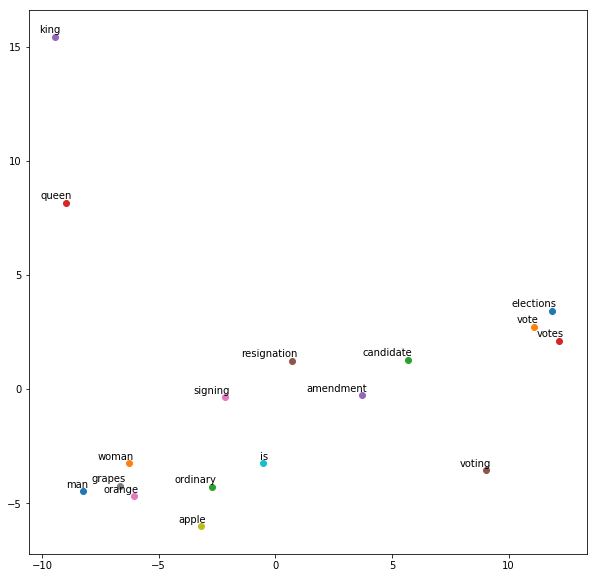

In [87]:
from matplotlib import pylab
from sklearn.decomposition import PCA

def plot(words):
  %matplotlib inline
  embeddings = [model[w] for w in words]
    
  #tsne = TSNE(n_components=2, random_state=0)
  #two_d_embeddings = tsne.fit_transform(embeddings)
    
    
  #tsne = PCA(n_components=2, random_state=0)
  #two_d_embeddings = tsne.fit_transform(embeddings)  
   
  pca = PCA(n_components=2)
  pca.fit(embeddings)
  two_d_embeddings = pca.transform(embeddings)

   
  pylab.figure(figsize=(10,10))  # in inches
    
  for i, label in enumerate(words):
    x, y = two_d_embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
  pylab.show()

plot("man woman ordinary queen king voting orange grapes apple is elections vote candidate votes amendment resignation signing".split())


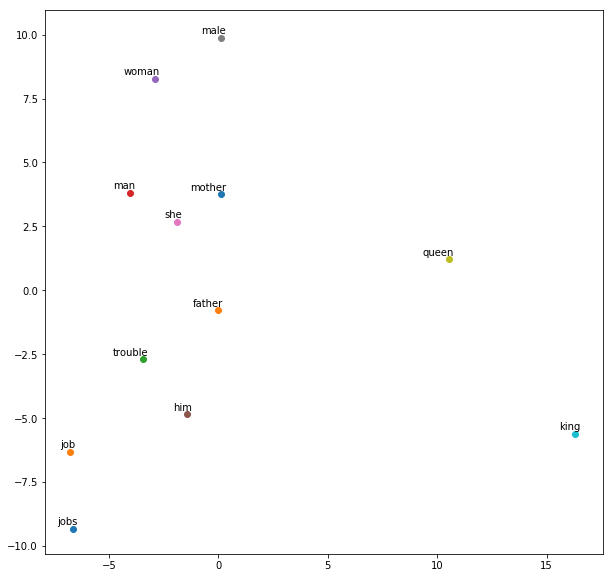

In [88]:
from matplotlib import pylab
from sklearn.decomposition import PCA

def plot(words):
  %matplotlib inline
  embeddings = [model[w] for w in words]
    
  pca = PCA(n_components=2)  
  two_d_embeddings = pca.fit_transform(embeddings)
   
  pylab.figure(figsize=(10,10))  # in inches
    
  for i, label in enumerate(words):
    x, y = two_d_embeddings[i,:]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
  pylab.show()

plot("jobs job trouble man woman him she male queen king mother father".split())

In [89]:
model.similarity("man", "woman")

0.55136821874758513

In [90]:
model.most_similar('election', topn=10)

[('elections', 0.8226377964019775),
 ('votes', 0.6342710256576538),
 ('vote', 0.6037394404411316),
 ('referendum', 0.5815456509590149),
 ('seats', 0.5740596055984497),
 ('voters', 0.5700013637542725),
 ('electorate', 0.5687454342842102),
 ('candidates', 0.5680900812149048),
 ('electoral', 0.5625552535057068),
 ('reelection', 0.5593470335006714)]

In [91]:
model.most_similar('absurdity', topn=3)

[('irony', 0.5236846208572388),
 ('embodiment', 0.4927930235862732),
 ('amoral', 0.4816593825817108)]

In [92]:
model.most_similar('manner', topn=4)

[('fashion', 0.5775747895240784),
 ('way', 0.5463697910308838),
 ('sense', 0.46051928400993347),
 ('circumstances', 0.45764678716659546)]

In [93]:
model.most_similar('fight', topn=4)

[('fighting', 0.5554428100585938),
 ('struggle', 0.519737720489502),
 ('fought', 0.5090537071228027),
 ('win', 0.5030024647712708)]

In [94]:
model.most_similar('interest', topn=4)

[('importance', 0.49823153018951416),
 ('attention', 0.48531386256217957),
 ('concern', 0.48444268107414246),
 ('interests', 0.480763703584671)]

In [95]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'],topn=1)

[('queen', 0.5403808951377869)]

In [96]:
def predict_output_word(model, context_words_list, topn=10):
    from gensim import utils, matutils
    from numpy import exp, log, dot, zeros, outer, random, dtype, float32 as REAL,\
    uint32, seterr, array, uint8, vstack, fromstring, sqrt, newaxis,\
    ndarray, empty, sum as np_sum, prod, ones, ascontiguousarray
    """Report the probability distribution of the center word given the context words as input to the trained model."""
    if not model.negative:
        raise RuntimeError("We have currently only implemented predict_output_word "
            "for the negative sampling scheme, so you need to have "
            "run word2vec with negative > 0 for this to work.")

    if not hasattr(model.wv, 'syn0') or not hasattr(model, 'syn1neg'):
        raise RuntimeError("Parameters required for predicting the output words not found.")

    word_vocabs = [model.wv.vocab[w] for w in context_words_list if w in model.wv.vocab]
    if not word_vocabs:
        warnings.warn("All the input context words are out-of-vocabulary for the current model.")
        return None

    word2_indices = [word.index for word in word_vocabs]

    l1 = np_sum(model.wv.syn0[word2_indices], axis=0)
    if word2_indices and model.cbow_mean:
        l1 /= len(word2_indices)

    prob_values = exp(dot(l1, model.syn1neg.T))     # propagate hidden -> output and take softmax to get probabilities
    prob_values /= sum(prob_values)
    top_indices = matutils.argsort(prob_values, topn=topn, reverse=True)
    return [(model.wv.index2word[index1], prob_values[index1]) for index1 in top_indices]   #returning the most probable output words with their probabilities


In [97]:
predict_output_word(model, ['Cocktails','be','served'], topn=5)

[('must', 0.58199346),
 ('should', 0.24418962),
 ('can', 0.071591228),
 ('may', 0.019285448),
 ('could', 0.0072295815)]

In [98]:
predict_output_word(model, ['Similar','payroll','boosts'], topn=5)

[('tax', 0.0043761274),
 ('taxes', 0.0030826277),
 ('their', 0.00058289838),
 ('duties', 0.00049023144),
 ('payroll', 0.00042778978)]

In [99]:
predict_output_word(model, ['He','will','attend'], topn=5)

[('attend', 0.73824304),
 ('continue', 0.059644111),
 ('school', 0.026795603),
 ('refuse', 0.019113991),
 ('tend', 0.013122556)]

In [100]:
predict_output_word(model, ['first','used','the'], topn=10)

[('widely', 0.24130674),
 ('describe', 0.1789539),
 ('term', 0.044405155),
 ('extensively', 0.0084622698),
 ('commonly', 0.0080452068),
 ('word', 0.0036174336),
 ('determine', 0.0029656717),
 ('denote', 0.0028943636),
 ('crusade', 0.0028511162),
 ('refer', 0.0027006366)]